In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Exploratory Data Analysis**

In [ ]:
# Importing the packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
# Reading the dataset
df_d=pd.read_csv('/content/drive/MyDrive/Disease Prediction 2/Datasets/diabetes.csv')
df_h=pd.read_csv('/content/drive/MyDrive/Disease Prediction 2/Datasets/heart.csv')
df_k=pd.read_csv('/content/drive/MyDrive/Disease Prediction 2/Datasets/kidney.csv')
df_l=pd.read_csv('/content/drive/MyDrive/Disease Prediction 2/Datasets/Liver.csv')

## Liver

In [ ]:
#Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convinient

## if score==negative, mark 0 ;else 1
def partition(x):
    if x == 2:
        return 0
    return 1

df_l['Result'] = df_l['Result'].map(partition)

In [ ]:
df_l[df_l['Gender'] == 'Male'][['Result', 'Gender']].head()


,Result,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


In [ ]:
## Label Male as 0 and Female as 1
## if score==negative, mark 0 ;else 1
def partition(x):
    if x =='Male':
        return 0
    return 1

df_l['Gender'] = df_l['Gender'].map(partition)

In [ ]:
df_l = df_l.drop_duplicates()
print( df_l.shape )

(19231, 11)


In [ ]:
df_l.isnull().values.any()


True

In [ ]:
df_l=df_l.dropna(how='any')


In [ ]:
df_l.shape
df_l.head()


,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


## KIDNEY DATA PREPROCESSING

In [ ]:
# dropping id column
df_k.drop('id', axis = 1, inplace = True)

In [ ]:
# rename column names to make it more user-friendly

df_k.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
#As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' are object type. We need to change them to numerical dtype.
# converting necessary columns to numerical type

df_k['packed_cell_volume'] = pd.to_numeric(df_k['packed_cell_volume'], errors='coerce')
df_k['white_blood_cell_count'] = pd.to_numeric(df_k['white_blood_cell_count'], errors='coerce')
df_k['red_blood_cell_count'] = pd.to_numeric(df_k['red_blood_cell_count'], errors='coerce')

In [ ]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df_k.columns if df_k[col].dtype == 'object']
num_cols = [col for col in df_k.columns if df_k[col].dtype != 'object']

In [ ]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df_k[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [ ]:
#There is some ambugity present in the columns we have to remove that.

# replace incorrect values

df_k['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df_k['coronary_artery_disease'] = df_k['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df_k['class'] = df_k['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [ ]:
df_k['class'] = df_k['class'].map({'ckd': 0, 'not ckd': 1})
df_k['class'] = pd.to_numeric(df_k['class'], errors='coerce')

In [ ]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df_k[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



In [ ]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df_k[feature].dropna().sample(df_k[feature].isna().sum())
    random_sample.index = df_k[df_k[feature].isnull()].index
    df_k.loc[df_k[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df_k[feature].mode()[0]
    df_k[feature] = df_k[feature].fillna(mode)

In [ ]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [ ]:
df_k[num_cols].isnull().sum()


age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [ ]:
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [ ]:
#All the missing values are handeled now, lets do ctaegorical features encoding now

for col in cat_cols:
    print(f"{col} has {df_k[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [ ]:
#As all of the categorical columns have 2 categories we can use label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df_k[col] = le.fit_transform(df_k[col])

In [ ]:
df_h['trestbps']=np.log(df_h['trestbps'])
df_h['chol']=np.log(df_h['chol'])
df_h['thalach']=np.log(df_h['thalach'])

np.var(df_h[["trestbps",'chol','thalach']])

trestbps    0.016894
chol        0.041401
thalach     0.027054
dtype: float64

## **Data Preprocessing** (Diabetes)

In [ ]:
# Printing the first 5 rows of the dataframe.
df_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Print the size of the data set. It consists of 768 observation units and 9 variables.
print("Dataset shape:", df_d.shape)

Dataset shape: (768, 9)


## Missing Observation Analysis

We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value. Below we replace 0 value by NaN:

In [ ]:
df_d[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_d[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Now, we can look at where are missing values
df_d.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# The missing values will be filled with the median values of each variable
def median_target(var):
    temp = df_d[df_d[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df_d.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df_d.loc[(df_d['Outcome'] == 0 ) & (df_d[i].isnull()), i] = median_target(i)[i][0]
    df_d.loc[(df_d['Outcome'] == 1 ) & (df_d[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
df_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Number of missing values
df_d.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Pair plot for clean data

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables.

## Outlier Observation Analysis

In [ ]:
for feature in df_d:

    Q1 = df_d[feature].quantile(0.25)
    Q3 = df_d[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df_d[(df_d[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


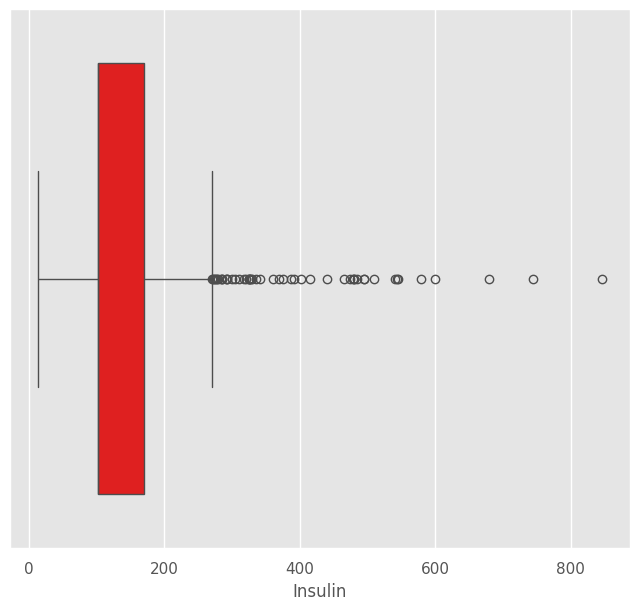

In [ ]:
# Outlier observation of Insulin
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = df_d["Insulin"], color="red");

In [ ]:
# Conducting a stand alone observation review for the Insulin variable
# Suppressing contradictory values
Q1 = df_d.Insulin.quantile(0.25)
Q3 = df_d.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_d.loc[df_d["Insulin"] > upper,"Insulin"] = upper

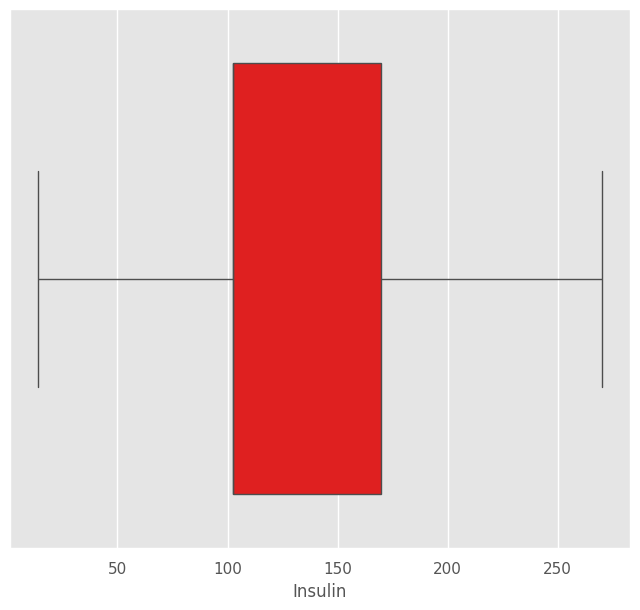

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = df_d["Insulin"], color="red");

## Local Outlier Factor (LOF)

In [ ]:
# Determining the outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df_d)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [ ]:
df_d_scores = lof.negative_outlier_factor_
np.sort(df_d_scores)[0:30]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248])

In [ ]:
# Choosing the threshold value according to lof scores
threshold = np.sort(df_d_scores)[7]
threshold

-1.740031580305444

In [ ]:
# Deleting those that are higher than the threshold
outlier = df_d_scores > threshold
df_d = df_d[outlier]

## Feature Engineering (Diabetes)

Creating new variables is important for models. But we need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [ ]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df_d["NewBMI"] = NewBMI
df_d.loc[df_d["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df_d.loc[(df_d["BMI"] > 18.5) & (df_d["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df_d.loc[(df_d["BMI"] > 24.9) & (df_d["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df_d.loc[(df_d["BMI"] > 29.9) & (df_d["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df_d.loc[(df_d["BMI"] > 34.9) & (df_d["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df_d.loc[df_d["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [ ]:
df_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [ ]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [ ]:
# The operation performed was added to the dataframe.
df_d = df_d.assign(NewInsulinScore=df_d.apply(set_insulin, axis=1))

df_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [ ]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df_d["NewGlucose"] = NewGlucose
df_d.loc[df_d["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df_d.loc[(df_d["Glucose"] > 70) & (df_d["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df_d.loc[(df_d["Glucose"] > 99) & (df_d["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df_d.loc[df_d["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [ ]:
df_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


## One Hot Encoding

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [ ]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
df_d = pd.get_dummies(df_d, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [ ]:
df_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1


In [ ]:
categorical_df_d = df_d[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [ ]:
categorical_df_d.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1


In [ ]:
y_d = df_d["Outcome"]
X_d = df_d.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X_d.columns
index = X_d.index

In [ ]:
X_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [ ]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.
# There are multiple standardization methods. These are methods such as "Normalize", "MinMax", "Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X_d)
X_d = transformer.transform(X_d)
X_d = pd.DataFrame(X, columns = cols, index = index)

In [ ]:
X_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [ ]:
X_d = pd.concat([X_d,categorical_df_d], axis = 1)

In [ ]:
X_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,0,0,0,0,0,0,0,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,1,0,1,0,1,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,0,0,0,0,0,0,0,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,1,0,1,0,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,0,0,1,0,0,0,0,0,0,1


In [ ]:
y_d.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64